<a href="https://colab.research.google.com/github/MominaSiddiq/AI_Generated_vs_HumanCreated_Sketches/blob/main/AI_vs_Human_sketches_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Imports

from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import collections
import tensorflow as tf
import matplotlib.pyplot as plt



# Fetch data
Fetching data from the drive in three folders (Splited Data): Test, Valid and Train  

In [3]:
# Fetch dataset from the drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Fetch the split data from the drive

train_dir = '/content/drive/MyDrive/sketch_classification_project/train'
valid_dir = '/content/drive/MyDrive/sketch_classification_project/valid'
test_dir = '/content/drive/MyDrive/sketch_classification_project/test'

# Pre-processing
Pre-processing of this images data include:


*   Re-sizing of images
*   Re-scaling image pixel values to 0 or 1
for efficient training.

Setting the batch size to 32 optimizes memory usage and speeds up training.



In [5]:
# Create an instance of ImageDataGenerator for each set

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_data = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/sketch_classification_project/train',
    target_size=(128, 128),  # Resize images to 128x128
    batch_size=32,
    class_mode='binary',  # Binary classification: AI vs Human
)

# Load validation data
valid_data = valid_datagen.flow_from_directory(
    '/content/drive/MyDrive/sketch_classification_project/valid',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
)

# Load test data
test_data = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/sketch_classification_project/test',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
)

Found 11774 images belonging to 2 classes.
Found 1120 images belonging to 2 classes.
Found 560 images belonging to 2 classes.


In [6]:
train_data.class_indices  # Displays class labels (e.g., {'AI': 0, 'Human': 1})

# Print class distribution

counter = collections.Counter(train_data.classes)
print("Training set class distribution:", counter)

counter_val = collections.Counter(valid_data.classes)
print("Validation set class distribution:", counter_val)

counter_test = collections.Counter(test_data.classes)
print("Test set class distribution:", counter_test)

Training set class distribution: Counter({0: 5894, 1: 5880})
Validation set class distribution: Counter({0: 560, 1: 560})
Test set class distribution: Counter({0: 280, 1: 280})


# Defining & Compiling CNN Model
Define and compile a basic CNN model for binary classification

In [7]:
# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

# Training CNN Model
Train the model on the training data and validate on the validation set.

In [8]:
# Train the model
history = model.fit(
    train_data,           # Training data
    epochs=10,            # Number of passes over the entire training dataset
    validation_data=valid_data  # Validation data for monitoring performance
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


368/368 ━━━━━━━━━━━━━━━━━━━━ 2999s 8s/step - accuracy: 0.5502 - loss: 0.7075 - val_accuracy: 0.6455 - val_loss: 0.6444
Epoch 2/10
368/368 ━━━━━━━━━━━━━━━━━━━━ 99s 199ms/step - accuracy: 0.6325 - loss: 0.6403 - val_accuracy: 0.6893 - val_loss: 0.6234
Epoch 3/10
368/368 ━━━━━━━━━━━━━━━━━━━━ 71s 189ms/step - accuracy: 0.7215 - loss: 0.5358 - val_accuracy: 0.6750 - val_loss: 0.6140
Epoch 4/10
368/368 ━━━━━━━━━━━━━━━━━━━━ 69s 184ms/step - accuracy: 0.7986 - loss: 0.4106 - val_accuracy: 0.6777 - val_loss: 0.6195
Epoch 5/10
368/368 ━━━━━━━━━━━━━━━━━━━━ 84s 191ms/step - accuracy: 0.8660 - loss: 0.2922 - val_accuracy: 0.6446 - val_loss: 0.7094
Epoch 6/10
368/368 ━━━━━━━━━━━━━━━━━━━━ 86s 202ms/step - accuracy: 0.9074 - loss: 0.2097 - val_accuracy: 0.6330 - val_loss: 0.7588
Epoch 7/10
368/368 ━━━━━━━━━━━━━━━━━━━━ 69s 185ms/step - accuracy: 0.9440 - loss: 0.1433 - val_accuracy: 0.6438 - val_loss: 0.9511
Epoch 8/10
368/368 ━━━━━━━━━━━━━━━━━━━━ 72s 192ms/step - accuracy: 0.9647 - loss: 0.0949 - val_

# Visualizing
To monitor the model's performance over time, plot the training and validation accuracy and loss.

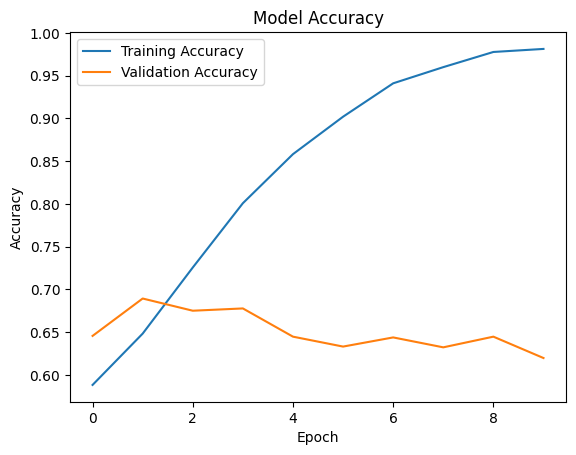

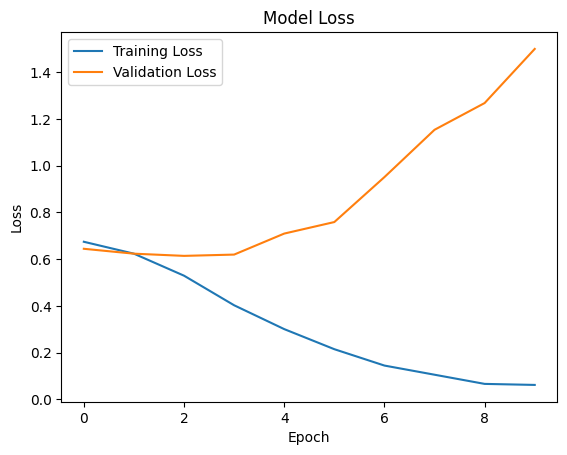

In [9]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()